In [1]:
from learningAgentsBase import ReinforceAlgorithm
from environmentModel import Model, AdversaryModes
from neuralNetwork import NNBase
import torch
import torch.nn as nn
from torch.distributions import Categorical

In [2]:
adversaryProbs=torch.zeros(len(AdversaryModes))
adversaryProbs[0]=1/3
adversaryProbs[2]=1/3
adversaryProbs[10]=1/3
game = Model(totalDemand = 400, 
               tupleCosts = (57, 71),
              totalStages = 3, adversaryProbs=adversaryProbs, advHistoryNum=2)
adversaryProbs

tensor([0.3333, 0.0000, 0.3333, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.3333, 0.0000])

In [3]:
game.reset()

(tensor([  0.0000, 200.0000, 128.5000,   0.0000,   0.0000]), 0, False)

In [4]:
game.adversaryChoosePrice()

135.5

In [5]:
neuralNet=NNBase(num_input=3+game.advHistoryNum, lr=0.0001,num_actions=4)
algorithm = ReinforceAlgorithm(game, neuralNet, numberIterations=1, numberEpisodes=1_000_000, discountFactor =0.9)

--------------------------------------------------
0   adversary:  AdversaryModes.guess_132
  actions:  tensor([3, 3, 3])
loss=  tensor(-0., grad_fn=<DivBackward0>)   , return=  15959.5087890625
probs of actions:  tensor([0.2357, 0.2328, 0.2319], grad_fn=<ExpBackward0>)
shouldBreak: False
baseDiscReturns/1000= tensor([0., 0., 0.])
meanStageValue=  tensor([14377.2637, 10304.4590,  5517.9932])
--------------------------------------------------
10000   adversary:  AdversaryModes.constant_95
  actions:  tensor([3, 3, 3])
loss=  tensor(-2.1665, grad_fn=<DivBackward0>)   , return=  12547.4150390625
probs of actions:  tensor([0.3130, 0.3050, 0.2894], grad_fn=<ExpBackward0>)
shouldBreak: False
baseDiscReturns/1000= tensor([-1.9158, -2.1232, -1.4136])
meanStageValue=  tensor([13415.2354,  9230.0996,  4786.7764])
--------------------------------------------------
20000   adversary:  AdversaryModes.constant_95
  actions:  tensor([2, 2, 1])
loss=  tensor(-2.9947, grad_fn=<DivBackward0>)   , return

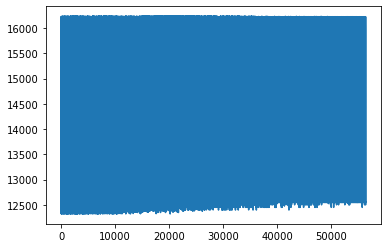

In [6]:
algorithm.solver()

In [7]:
advModeNames=""
for i in range(len(adversaryProbs)):
    if adversaryProbs[i]!=0:
        tmp="{:.1f}".format(adversaryProbs[i])
        advModeNames+=f"{(AdversaryModes(i)).name}-{tmp}-"
    
name=f"ep {algorithm.numberEpisodes}, {advModeNames}, {game.advHistoryNum} hist, {neuralNet.lr} lr"
neuralNet.save(name=name)

In [8]:
import pandas as pd
profits = pd.DataFrame(game.profit).T
prices = pd.DataFrame(game.prices).T
demandPotential = pd.DataFrame(game.demandPotential).T
learning = pd.DataFrame(algorithm.returns[0],columns=['entry'])
loss=pd.DataFrame(algorithm.loss[0],columns=['entry'])

,0,1
0,200.0000,200.0000
1,184.7500,215.2500
2,173.3125,226.6875


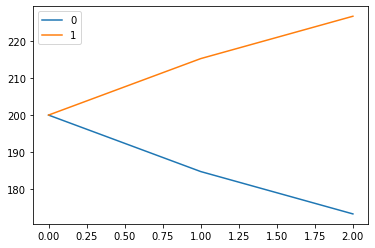

In [9]:
demandPotential.plot()
demandPotential

In [10]:
profits.sum(axis=0)

0    12547.415039
1    11465.649414
dtype: float64

,0,1
0,5103.250000,2520.000000
1,4071.015625,2886.000000
2,3373.149414,6059.649414


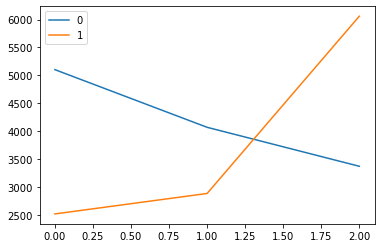

In [11]:
profits.plot()
profits


,0,1
0,125.50000,95.00000
1,117.87500,95.00000
2,112.15625,148.84375


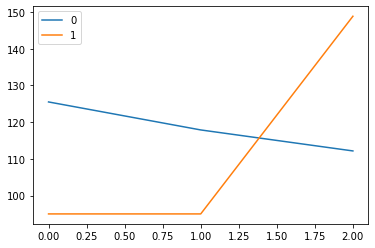

In [12]:
prices.plot()
prices

<AxesSubplot:>

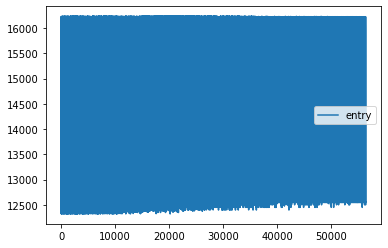

In [13]:
learning.plot()

In [14]:
# pricelearning = pd.DataFrame(game.prices.mean(axis = 0))
# pricelearning.plot()

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
learning = learning.to_numpy()
learning_2 = [0]*len(learning)
for i in range(len(learning)):
    learning_2[i] = learning[i][0]

In [17]:
avg_learning = np.convolve(learning_2, np.ones(1000)/1000, mode = 'valid')

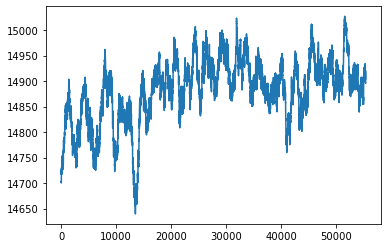

In [18]:
plt.plot(avg_learning)
plt.show()

<AxesSubplot:>

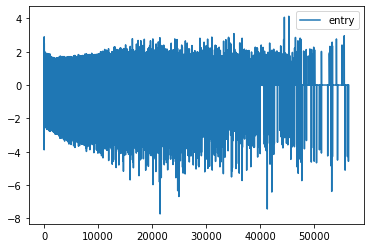

In [19]:
loss.plot()